In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [10]:
data = pd.read_csv('sentiment_analysis.csv')

In [11]:
data.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [12]:
data.isnull().sum()

Year             0
Month            0
Day              0
Time of Tweet    0
text             0
sentiment        0
Platform         0
dtype: int64

In [13]:
data.count()

Year             499
Month            499
Day              499
Time of Tweet    499
text             499
sentiment        499
Platform         499
dtype: int64

In [14]:
data.shape

(499, 7)

In [15]:
data.duplicated().sum()

105

In [16]:
data.drop_duplicates(inplace = True)

In [17]:
data.duplicated().sum()

0

In [18]:
data.count()

Year             394
Month            394
Day              394
Time of Tweet    394
text             394
sentiment        394
Platform         394
dtype: int64

In [19]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\qwert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\qwert\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\qwert\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [21]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

In [22]:
data['cleaned_review'] = data['text'].apply(preprocess_text)

In [23]:
data.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform,cleaned_review
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter,great day look like dream
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook,feel sorry miss sea beach
2,2017,8,18,night,Don't angry me,negative,Facebook,angry
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook,attend class listening teacher reading slide n...
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram,want go let go


In [24]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\qwert\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [55]:
data['sentiment_score'] = data['cleaned_review'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['predicted_sentiment'] = data['sentiment_score'].apply(lambda x: 'positive' if x >= 0 else 'negative')
print(data[['cleaned_review', 'sentiment_score', 'predicted_sentiment']].head())

                                      cleaned_review  sentiment_score  \
0                          great day look like dream           0.8225   
1                          feel sorry miss sea beach          -0.2263   
2                                              angry          -0.5106   
3  attend class listening teacher reading slide n...           0.0000   
4                                     want go let go           0.0772   

  predicted_sentiment  
0            positive  
1            negative  
2            negative  
3            positive  
4            positive  


In [57]:
data[['cleaned_review', 'sentiment_score', 'predicted_sentiment']].head(10)

,cleaned_review,sentiment_score,predicted_sentiment
0,great day look like dream,0.8225,positive
1,feel sorry miss sea beach,-0.2263,negative
2,angry,-0.5106,negative
3,attend class listening teacher reading slide n...,0.0000,positive
4,want go let go,0.0772,positive
5,night feeling neutral,0.1280,positive
6,feeding baby fun smile coo,0.7003,positive
7,soooo high,0.0000,positive
8,,0.0000,positive
9,today first time arrive boat amazing journey,0.5859,positive


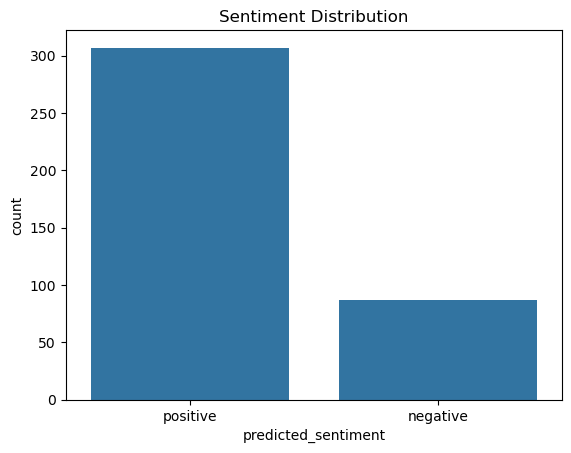

In [26]:
sns.countplot(x='predicted_sentiment', data=data)
plt.title('Sentiment Distribution')
plt.show()

In [27]:
!pip install wordcloud

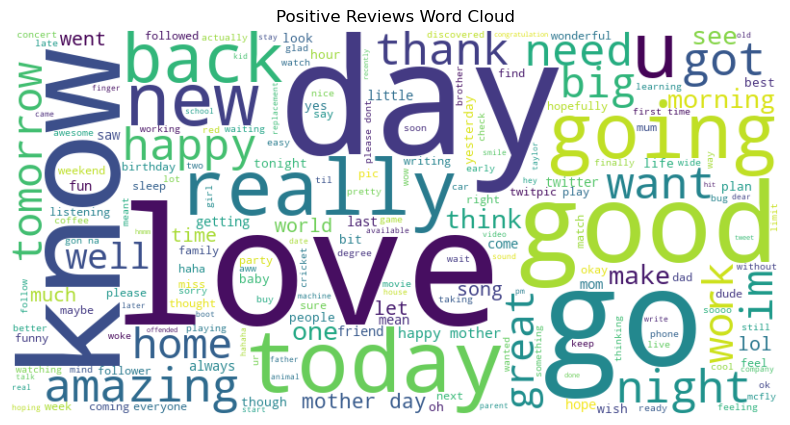

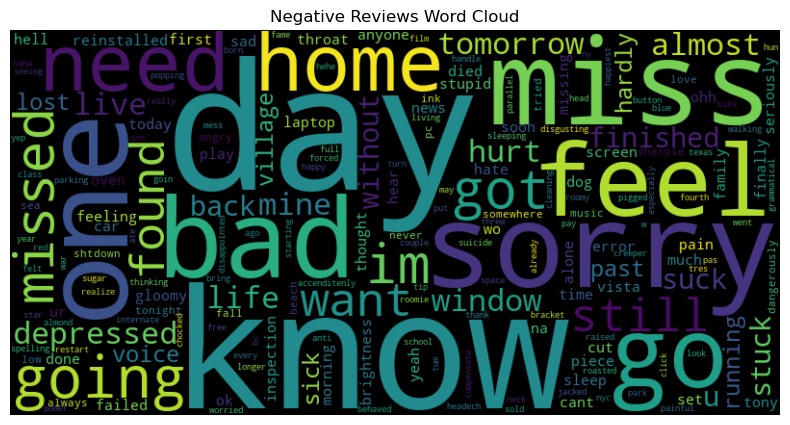

In [28]:
from wordcloud import WordCloud

positive_reviews = ' '.join(data[data['predicted_sentiment'] == 'positive']['cleaned_review'])
negative_reviews = ' '.join(data[data['predicted_sentiment'] == 'negative']['cleaned_review'])

# Positive Word Cloud
wc = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

# Negative Word Cloud
wc = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

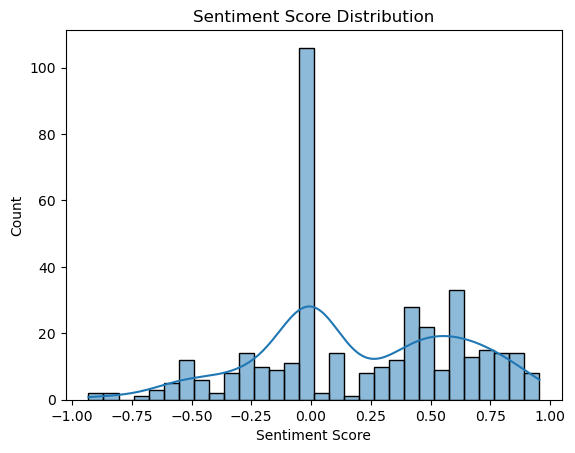

In [61]:
sns.histplot(data['sentiment_score'],kde=True, bins=30)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.show()